<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Airline Tweets Sentiment Analysis Lab

_Authors: Phillippa Thomson (NYC)_

---

You are going to be analyzing tweets about airlines.  These have been hand-tagged with sentiment.  There are three categories: positive, neutral, and negative.

Use VADER to calculate sentiment for each tweet, and see if you can correctly predict the hand-tagged sentiment.

What is the accuracy?  Print out a heatmap to see where your model performs well, and where it performs poorly.

In [34]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, \
precision_score, recall_score
from sklearn.model_selection import cross_val_score, train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob, Word
%matplotlib inline

In [15]:
tweets = pd.read_csv("../data/Tweets.csv", encoding='latin-1')

In [16]:
tweets.head()

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...


In [17]:
tweets.shape

(14640, 3)

### 1. Preview the airline_sentiment column.
- What percentage of reviews are positive, neutral, and negative?

In [44]:
# A:

tweets.airline_sentiment.value_counts(normalize=True)


negative    0.626913
neutral     0.211680
positive    0.161407
Name: airline_sentiment, dtype: float64

In [45]:
tweets.groupby(['airline', 'airline_sentiment']).count()

text  predicted_sentiment  airline_Delta  \
airline        airline_sentiment                                             
American       negative           1960                 1960           1960   
               neutral             463                  463            463   
               positive            336                  336            336   
Delta          negative            955                  955            955   
               neutral             723                  723            723   
               positive            544                  544            544   
Southwest      negative           1186                 1186           1186   
               neutral             664                  664            664   
               positive            570                  570            570   
US Airways     negative           2263                 2263           2263   
               neutral             381                  381            381   
               positive            269                  269            269   
United         negative           2633                 2633           2633   
               neutral             697                  697            697   
               positive            492                  492            492   
Virgin America negative            181                  181            181   
               neutral             171                  171            171   
               positive            152                  152            152   

                                  airline_Southwest  airline_US Airways  \
airline        airline_sentiment                                          
American       negative                        1960                1960   
               neutral                          463                 463   
               positive                         336                 336   
Delta          negative                         955                 955   
               neutral                          723                 723   
               positive                         544                 544   
Southwest      negative                        1186                1186   
               neutral                          664                 664   
               positive                         570                 570   
US Airways     negative                        2263                2263   
               neutral                          381                 381   
               positive                         269                 269   
United         negative                        2633                2633   
               neutral                          697                 697   
               positive                         492                 492   
Virgin America negative                         181                 181   
               neutral                          171                 171   
               positive                         152                 152   

                                  airline_United  airline_Virgin America  
airline        airline_sentiment                                          
American       negative                     1960                    1960  
               neutral                       463                     463  
               positive                      336                     336  
Delta          negative                      955                     955  
               neutral                       723                     723  
               positive                      544                     544  
Southwest      negative                     1186                    1186  
               neutral                       664                     664  
               positive                      570                     570  
US Airways     negative                     2263                    2263  
               neutral                       381                     381

### 2. Add the sentiment of each tweet as a new column, using TextBlob's sentiment analysis.

In [19]:
# A:
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [22]:
tweets['predicted_sentiment'] = tweets.text.apply(detect_sentiment)

In [47]:
tweets

,airline_sentiment,airline,text,predicted_sentiment,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,0.000000,0,0,0,0,1
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,0.000000,0,0,0,0,1
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,-0.390625,0,0,0,0,1
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,0.006250,0,0,0,0,1
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,-0.350000,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
14635,positive,American,@AmericanAir thank you we got on a different f...,0.000000,0,0,0,0,0
14636,negative,American,@AmericanAir leaving over 20 minutes Late Flig...,-0.300000,0,0,0,0,0
14637,neutral,American,@AmericanAir Please bring American Airlines to...,0.000000,0,0,0,0,0
14638,negative,American,"@AmericanAir you have my money, you change my ...",-0.125000,0,0,0,0,0


### 3. Store airline_sentiment in y to use as labels and create an appropriate feature matrix, X.

In [26]:
airline_dum = pd.get_dummies(tweets.airline, prefix='airline', drop_first=True)
airline_dum

,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
14635,0,0,0,0,0
14636,0,0,0,0,0
14637,0,0,0,0,0
14638,0,0,0,0,0


In [27]:
tweets = pd.concat([tweets, airline_dum], axis=1)

In [28]:
tweets

,airline_sentiment,airline,text,predicted_sentiment,airline_Delta,airline_Southwest,airline_US Airways,airline_United,airline_Virgin America
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.,0.000000,0,0,0,0,1
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...,0.000000,0,0,0,0,1
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...,-0.390625,0,0,0,0,1
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...,0.006250,0,0,0,0,1
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...,-0.350000,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
14635,positive,American,@AmericanAir thank you we got on a different f...,0.000000,0,0,0,0,0
14636,negative,American,@AmericanAir leaving over 20 minutes Late Flig...,-0.300000,0,0,0,0,0
14637,neutral,American,@AmericanAir Please bring American Airlines to...,0.000000,0,0,0,0,0
14638,negative,American,"@AmericanAir you have my money, you change my ...",-0.125000,0,0,0,0,0


In [29]:
# A:
features = ['airline_Delta','airline_Southwest','airline_US Airways','airline_United','airline_Virgin America','predicted_sentiment']

X = tweets[features]
y = tweets.airline_sentiment

### 4. Fit a model of your choice to predict airline_sentient and cross-validate.

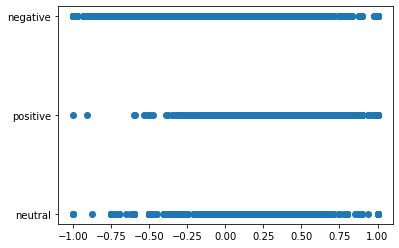

In [30]:
# A:

plt.scatter(tweets.predicted_sentiment, tweets.airline_sentiment)

In [37]:
rf = RandomForestClassifier()

In [40]:
# A:

rf.fit(X,y)

cross_val_score(rf, X, y)

array([0.62670765, 0.57718579, 0.44603825, 0.62978142, 0.6284153 ])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# A:

### 5. Display the confusion matrix.
- What reviews are difficult to identify?

In [42]:
# A:

confusion_matrix(y_test, rf.predict(X_test))

#      pred neg    pred neu    pred pos
# neg
# neu
# pos



array([[1994,  184,  120],
       [ 518,  160,   69],
       [ 306,   92,  217]], dtype=int64)

### 6. Print the classification report and discuss the characteristics of the model.

In [43]:
# A:

print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.71      0.87      0.78      2298
     neutral       0.37      0.21      0.27       747
    positive       0.53      0.35      0.43       615

    accuracy                           0.65      3660
   macro avg       0.54      0.48      0.49      3660
weighted avg       0.61      0.65      0.62      3660



The model does ok with negative tweets (the predominant class) but quite poorly with neutral.

To put this in perspective, human concordance, the probability that two people assign the same sentiment to an observation is usually around 70%-80% our baseline is at 63%. Even small increases in accuracy quickly move us towards a theoretical maximum in performance.